Complete the exercises below For **Assignment #5**.

In this exercise, we are building a logistic regression classification model. We'll work with the [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).  

Load the `tidymodels` library. 

In [3]:
library('tidymodels')


Warning message:
“Your system is mis-configured: ‘/var/db/timezone/localtime’ is not a symlink”
Warning message:
“‘/var/db/timezone/localtime’ is not identical to any known timezone file”
── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ broom        1.0.6     ✔ recipes      1.1.0
✔ dials        1.3.0     ✔ rsample      1.2.1
✔ dplyr        1.1.4     ✔ tibble       3.2.1
✔ ggplot2      3.5.1     ✔ tidyr        1.3.1
✔ infer        1.0.7     ✔ tune         1.2.1
✔ modeldata    1.4.0     ✔ workflows    1.1.4
✔ parsnip      1.2.1     ✔ workflowsets 1.1.0
✔ purrr        1.0.2     ✔ yardstick    1.3.1

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Search for functions across packages at https://www.tidymodels.org/find/



The data is located in your homework directory in the `diabetes.csv` file. Read in the data by running the following cell. We are "splitting" the data into training and testing sets. We will evaluate our model's performance with the test set.

In [4]:
diabetes = readr::read_csv('diabetes.csv') |> mutate(Outcome = factor(Outcome))

split = initial_split(diabetes, strata = Outcome)

diabetes_train = training(split)
diabetes_test = testing(split)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Glimpse the `diabetes_train` table.

In [5]:
glimpse(diabetes_train)

Rows: 576
Columns: 9
$ Pregnancies              <dbl> 1, 5, 10, 4, 10, 1, 8, 1, 13, 5, 5, 3, 6, 11,…
$ Glucose                  <dbl> 89, 116, 115, 110, 139, 103, 99, 97, 145, 117…
$ BloodPressure            <dbl> 66, 74, 0, 92, 80, 30, 84, 66, 82, 92, 75, 58…
$ SkinThickness            <dbl> 23, 0, 0, 0, 0, 38, 0, 15, 19, 0, 26, 11, 0, …
$ Insulin                  <dbl> 94, 0, 0, 0, 0, 83, 0, 140, 110, 0, 0, 54, 0,…
$ BMI                      <dbl> 28.1, 25.6, 35.3, 37.6, 27.1, 43.3, 35.4, 23.…
$ DiabetesPedigreeFunction <dbl> 0.167, 0.201, 0.134, 0.191, 1.441, 0.183, 0.3…
$ Age                      <dbl> 21, 30, 29, 30, 57, 33, 50, 22, 57, 38, 60, 2…
$ Outcome                  <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


❓ Which variable is suitable as the "outcome" in a logistic regression model?

**Answer:**

The Outcome variable is suitable as the "outcome" variable in a logistic regression model because it is a binary variable (in this instance a factor). The Outcome variable is 1 if the patient is diagnosted with diabetes and 0 if not. 

❓ Navigate to [Kaggle page](https://www.kaggle.com/datasets/mathchi/diabetes-data-set) for this dataset. Find descriptions for the `Glucose` and `BMI` columns. Add these descriptions to the [Markdown table](https://www.markdownguide.org/extended-syntax/#tables) below.

| Column name | Description |
| :---------- | :---------- |
| Glucose     | Plasma glucose concentration a 2 hours in an oral glucose tolerance test            |
| BMI         | Body mass index (weight in kg/(height in m)^2)            |

Make a bar chart showing the frequency of each "outcome" in the `Outcome` column from your `diabetes_train` data.

Warning message:
“The dot-dot notation (`..count..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(count)` instead.”


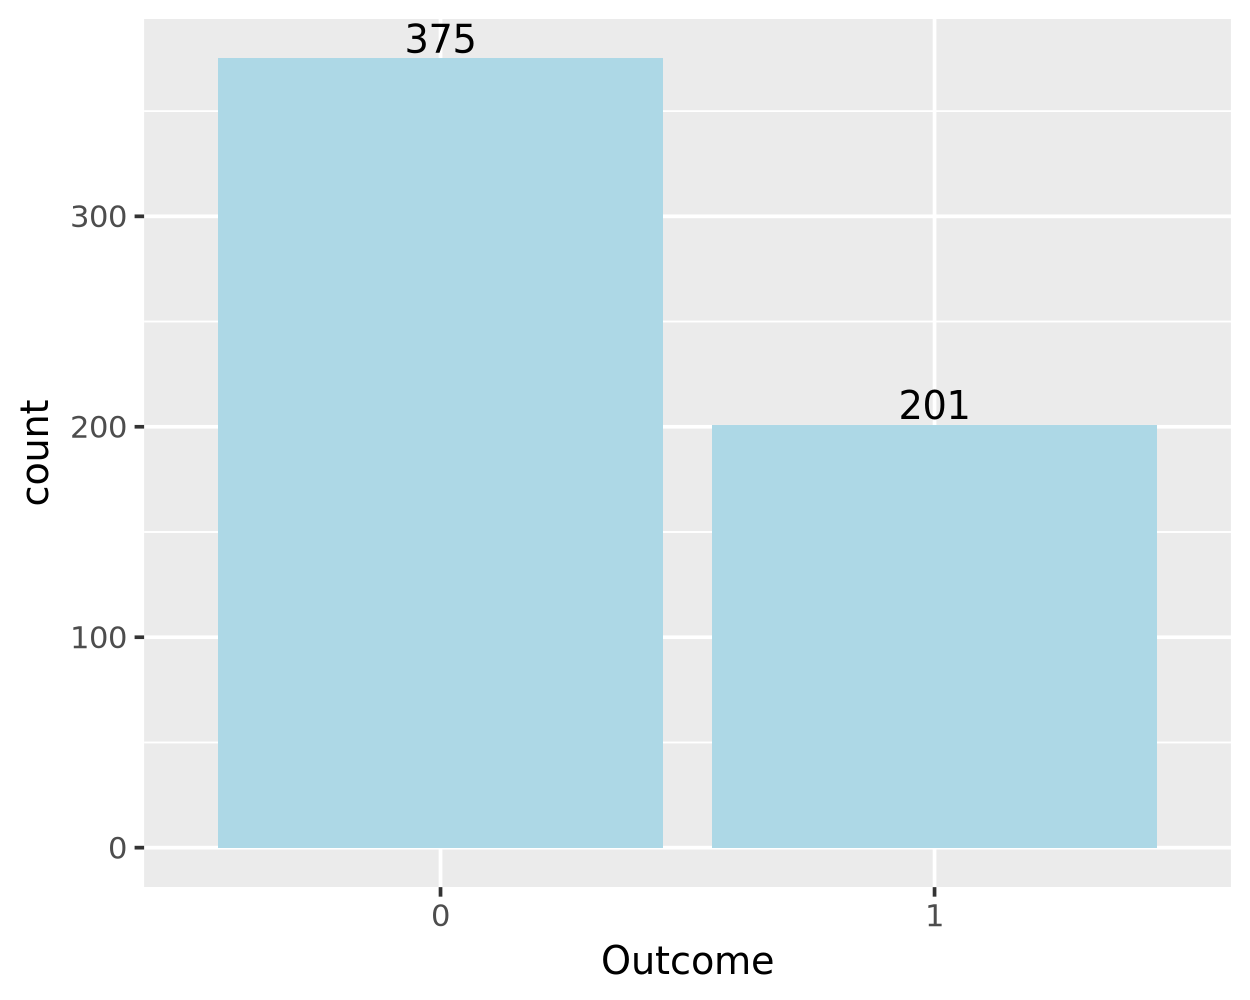

In [6]:
ggplot(diabetes_train, aes(x = Outcome)) + 
    geom_bar(fill = 'lightblue') +
    geom_text(stat = 'count', aes(label = ..count..), vjust = -0.2)

❓ Is the data balanced? I.e. do we have equal counts of each outcome?

**Answer:**

No, the outcome variable favors the non-diagnosis outcome. There are 375 non-diagnosed outcomes compared to 201 diagnosed outcomes for patients for female patients at least 21 years old of Pima Indian Heritage. 

Run the code below to create a table for plotting the predictors we will use in our model: `Glucose` and `BMI`. 

In [7]:
plot_df = diabetes_train |>
    select(Outcome, Glucose, BMI) |>
    pivot_longer(cols = c(Glucose, BMI))

plot_df |> head()

Outcome,name,value
<fct>,<chr>,<dbl>
0,Glucose,89.0
0,BMI,28.1
0,Glucose,116.0
0,BMI,25.6
0,Glucose,115.0
0,BMI,35.3


Using `plot_df`, make a chart showing the relationship of `Glucose` and `BMI` with `Outcome`. 

- use `geom_jitter` for your "geom"
- `facet_wrap` your chart by the `name` variable. (e.g. `facet_wrap(~name, ncol = 2, scales = 'free_x')`)

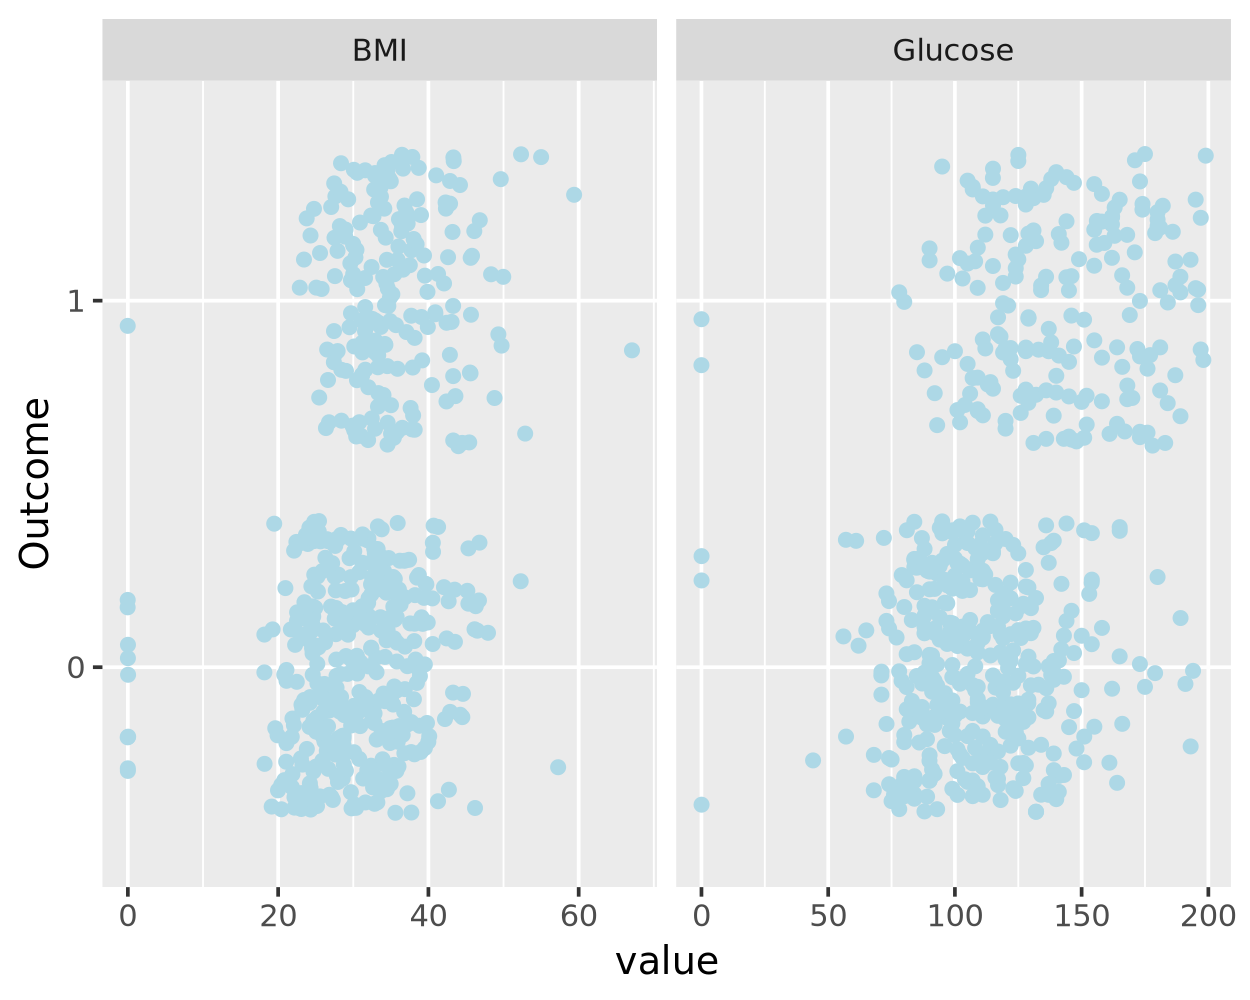

In [8]:
ggplot(plot_df, aes(y = Outcome)) + 
    geom_jitter(aes(x = value), color = 'lightblue') + 
    facet_wrap(~name, ncol = 2, scales = 'free_x') 


❓ What happens when you remove the `scales = 'free_x'` argument from the `facet_wrap` function?

**Answer:**

Removing scale = 'free_x' from the facet_wrap function levels the x ticks to the same range of 0 to 200. it condensing the BMI data because the range for BMI x values is 0 (which makes little sense) to roughly 60, while the Glucose variabel takes the range of 0 to 200.

Using your training data, build logistic regression model of `Outcome` with `BMI` and `Glucose` as predictors. 
- Use "glm" for you engine
- The formula for your fit function will be `Outcome ~ BMI + Glucose`

In [14]:
log_mod = logistic_reg() %>% set_engine('glm')

mod_fit = log_mod %>% fit(Outcome ~ BMI + Glucose, data = diabetes_train)

mod_fit %>% tidy()

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-7.75924832,0.715135754,-10.850036,1.993479e-27
BMI,0.08455731,0.015196363,5.564312,2.631887e-08
Glucose,0.03504005,0.003807874,9.201999,3.513503e-20


Using `augment` with your fitted model and the `diabetes_test` data as arguments, create a new dataset called `diabetes_test_wPred` that is the `diabetes_test` table including predictions from your model. 

In [34]:
diabetes_test_wPred = augment(mod_fit, new_data = diabetes_test)

Run the code below to generate a confusion matrix for your model predictions. 

(❗️Hint: See Table 4.4 from [*Introduction to Statistical Learning (Version 2)*](https://www.statlearning.com/) for an example confusion matrix.)

In [33]:
diabetes_test_wPred = augment(mod_fit, new_data = diabetes_test)

diabetes_test_wPred |> conf_mat(Outcome, .pred_class)

# augment(mod_fit, new_data = diabetes_test) %>%
#     summarize(error_rate = mean(Outcome != .pred_class))

          Truth
Prediction   0   1
         0 110  28
         1  15  39

❓ Based on the confusion matrix above, 
- How many individuals had diabetes in your test data?
- Of those that actually had diabetes, how many were predicted to have diabetes by your model?
- How many individuals predicted to have diabetes did not have diabetes?

**Answer:**

In the test data, 67 individuals had diabetes. Out of the 67 individuals, only 39 were predicted to have diabetes by the model above. The model predicted 54 individuals to have diabetes. Out of those 54 individuals, 15 did not have diabetes. A total of 43 individuals were misdiagnosed out of the 192 in the test set. This implies an error rate for the model of ~22.4%. This indicates the model is not an accurate predictor of diabetes, but a close approximation. 